<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/%EC%9D%8C%EC%84%B1%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ex01_%EC%9D%8C%EC%84%B1%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 작업디렉토리 변경
%cd "/content/drive/MyDrive/ESTCampAI/음성데이터분석"

/content/drive/MyDrive/ESTCampAI/음성데이터분석


## 음성특징 추출 기술의 변화
| 시대/세대               | 주요 입력 특징                                       | 대표 활용 기술                                                | 장점                                                            | 한계                                                  |
| ------------------- | ---------------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------------- | --------------------------------------------------- |
| **1980s\~2000s 초반** | **MFCC** (Mel-Frequency Cepstral Coefficients) | GMM-HMM 기반 ASR, 전통 화자 인식(i-vector)                      | - 사람 귀 모델링 반영<br>- 저차원(13\~39D) → 계산 가벼움                      | - 고주파·잡음에 취약<br>- 화자·채널 변화에 민감<br>- 프레임 간 연관성 약     |
| **2010s**           | **Mel-Spectrogram / Log-Mel**                  | DNN, CNN, RNN 기반 음향모델<br>(DeepSpeech, CNN-HMM hybrid 등) | - 더 풍부한 주파수-시간 정보 보존<br>- 이미지처럼 CNN 적용 가능                     | - 여전히 handcrafted feature (STFT, Mel filterbank 필요) |
| **2016\~현재**        | **Waveform 직접 입력 (raw audio)**                 | End-to-End 모델 (WaveNet, wav2vec, HuBERT, Whisper 등)     | - 특징 추출 자동 학습<br>- 큰 데이터로 “최적 특징”을 스스로 학습<br>- 잡음·화자 변화에 더 강함 | - 연산량↑, 대규모 데이터·모델 필요<br>- 작은 데이터셋 학습은 어려움          |

| 분야                                               | 주요 목표              | 입력 특징                                       | 대표 기술/알고리즘                                                      | 활용 사례                   |
| ------------------------------------------------ | ------------------ | ------------------------------------------- | --------------------------------------------------------------- | ----------------------- |
| **음성 전처리 (Speech Signal Processing)**            | 신호 정제 & 특징 추출      | Waveform, STFT                              | VAD(음성구간검출), 잡음제거, Mel-Spectrogram, MFCC                        | 녹음 전처리, ASR 입력 준비       |
| **자동 음성 인식 (ASR, Automatic Speech Recognition)** | “사람이 말한 걸 문자로 바꾸기” | MFCC, Mel-Spec, (최근 Waveform)               | HMM-GMM, DNN-HMM, CTC, RNN-Transducer, Transformer, Whisper     | 자막 생성, AI 비서, 회의록       |
| **화자 인식 (Speaker Recognition)**                  | “누가 말했는가?”         | MFCC, i-vector, x-vector, speaker embedding | GMM-UBM, i-vector+PLDA, x-vector+DNN                            | 보안 인증, 출입 통제            |
| **화자 분할 (Speaker Diarization)**                  | “언제 누가 말했는가?”      | MFCC, Embedding                             | 군집화(K-means, Spectral), x-vector diarization, EEND              | 회의 기록, 방송 자막            |
| **화자 분리 (Speech Separation)**                    | “동시에 말한 목소리 분리”    | Waveform, STFT (복소수)                        | ICA, NMF, PIT, Conv-TasNet, SepFormer                           | 회의 다화자 분리, 보청기          |
| **음성 합성 (TTS, Text-to-Speech)**                  | “글자를 소리로 바꾸기”      | 텍스트, phoneme                                | Concatenative, HMM-TTS, Tacotron, FastSpeech, WaveNet, HiFi-GAN | 음성 안내, 내레이션, AI 성우      |
| **키워드 스팟팅 (Keyword Spotting)**                   | “특정 단어 탐지”         | MFCC, Mel-Spec                              | DTW, GMM/SVM, CNN/DS-CNN, CRNN                                  | “Hey Siri”, “OK Google” |
| **감정 인식 (Speech Emotion Recognition)**           | “말투로 감정 파악”        | MFCC, Mel-Spec, Embedding                   | SVM, CNN+LSTM, Transformer                                      | 상담 분석, 헬스케어 모니터링        |
| **음성 이해 (SLU, Spoken Language Understanding)**   | “말의 의미와 의도 해석”     | 텍스트+Prosody                                 | Intent classification, Joint ASR+NLU                            | AI 챗봇, 대화형 AI           |

## 학습목표
- 음성데이터의 구조 이해
- Mel spectrogram, MFCC 개념

## 아날로그 vs 디지털
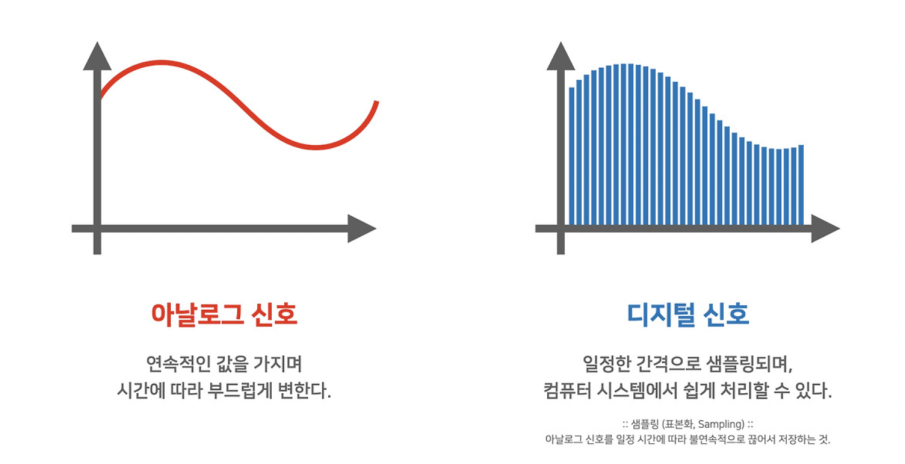

#### 샘플링레이트(Sampling rate)
- 샘플링 : 아날로그 신호 데이터에서 일정 주기로 데이터를 추출하는 행위
- 레이트 : 시간당 추출하는 횟수 (44.1kHz -> 1초에 44100번 추출)
- 인간의 가청 주파수 : 20Hz ~ 20kHz
- 인간의 음성은 보통 0~8kHz (16000Hz로 보통 기본 성정된 패키지가 많음)
- 나이퀴스트-섀넌 샘플링 이론 : 특성신호에서 가장 높은 진동수의 2배에 해당하는 샘플링레이트로 저장하면 오리지널 데이터를 복원할 수 있다.

## 관련 패키지 설지

In [ ]:
!pip install -q --upgrade torch torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5

In [ ]:
!pip install torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00


## 오디오 파일 탐색

In [ ]:
import torch, torchaudio # 오디오데이터 처리용
import matplotlib.pyplot as plt # 시각화용
from torchaudio.transforms import MelSpectrogram, MFCC # 오디오 전처리 도구

In [ ]:
# 음원데이터 읽기 (채널정보를 포함한 실제데이터, 샘플링레이트 리턴)
waveform, sr = torchaudio.load("./data/한국어.wav")

In [ ]:
# waveform shape 확인
# 앞에 있는 숫자는 채널 (모노, 스테레오)
waveform.shape

torch.Size([1, 253952])

In [ ]:
# 샘플링레이트 확인
sr

44100

In [ ]:
# 음원데이터 길이 확인
waveform.shape[1] / sr

5.758548752834467

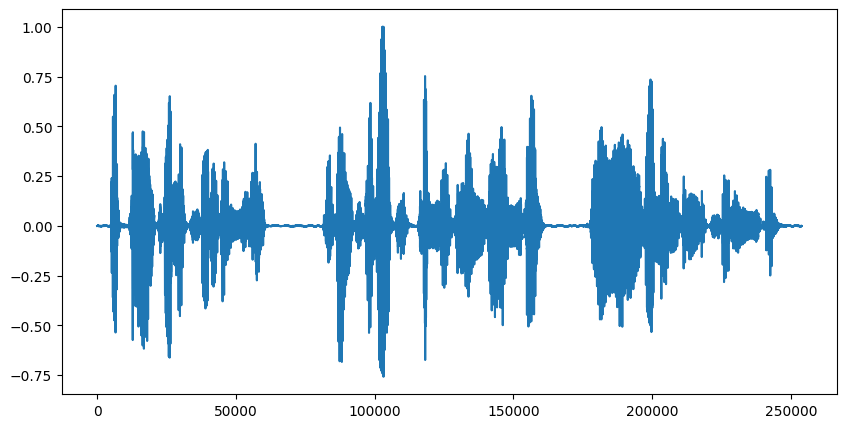

In [ ]:
# 음원데이터 시각화하기
plt.figure(figsize = (10, 5)) # 가로, 세로 크기
plt.plot(waveform[0])
plt.show()

In [ ]:
# 음원데이터 플레이
from IPython.display import display, Audio

In [ ]:
display(Audio(waveform[0], rate=sr))

In [ ]:
# 천천히 플레이하기
display(Audio(waveform[0], rate=22050))

In [ ]:
# 빠르게 플레이하기
display(Audio(waveform[0], rate=88200))

## Mel Sprectrogram
- FFT(Fasr Fourier Transform) : 시간축 중심의 데이터를 주파수 중심의 데이터로 변환하는 작업
- FFT로 변환된 수 많은 데이터를 일정범위(멜벤드)영역으로 window를 구성하여 분포를 추출하는 작업을 실시 -> feature(특성)
- 보편적으로는 멜 밴드를 64개의 구간으로 하지만 각 구간의 범위는 균등하지 않음
- 초반 멜 밴드는 인간의 청력을 본따서 촘촘하게 구간이 설정되어있고, 후만 멜 밴드는 구간이 널널하게 설정되어있다. -> 인간의 청력이 로그스케일로 동작하기 때문

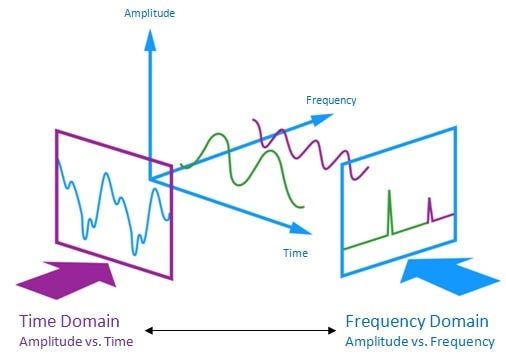

In [ ]:
mel_spectrogram = MelSpectrogram(
    sample_rate = sr, # 샘플링레이트 설정
    n_mels = 64 # 멜 밴드 개수 설정
)

/usr/local/lib/python3.12/dist-packages/torchaudio/functional/functional.py:582: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [ ]:
result = mel_spectrogram(waveform[0])
result.shape

torch.Size([64, 1270])

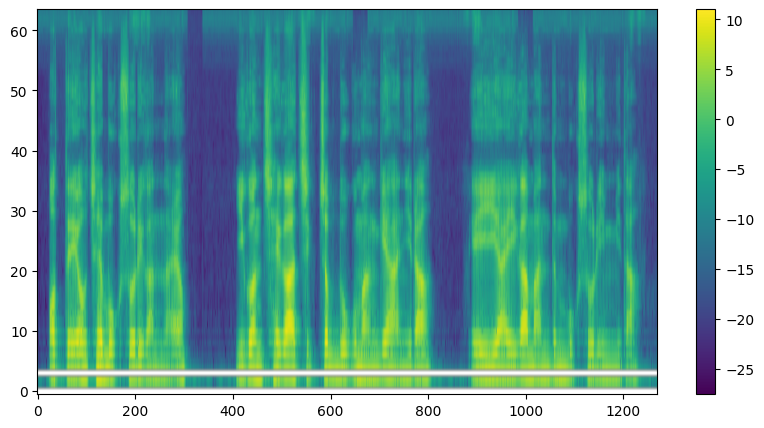

In [ ]:
# 시각화
plt.figure(figsize = (10, 5))
plt.imshow(result.log2().numpy(), # 로그변환하고 넘파이로 변경
           aspect = 'auto', # x, y 축의 스케일 범위가 너무 다른 부분을 잡아줌
           origin = 'lower') # y축을 반대로(작은값이 아래 큰값이 위에)
plt.colorbar() #
plt.show()

#### MFCC
- 멜스펙트로그램의 처리를 그대로 수행하고 후속처리가 추가된 방식
- 멜스펙트로그램이 인간이 받아들이는 형태로 변환한거라면 MFCC는 거기서 한 번 더 데이터를 추상화(요약)한 방식
- 멜스펙트로그램 결과 값에서 코사인 주기별 데이터를 집계내리는 처리 수행
  1. 음원데이터를 일정 시간마다 자르기 (20~25ms)
  2. 잘라진 조각에 FFT 수행
  3. 사람의 로그스케일을 반영한 멜 밴드 구간을 만들어서 집계
  4. 나온 결과 값에 코사인주기 성분을 추출해서 집계
- 용량압축효과, 일부 노이즈제거 효과, 피쳐가 독립성을 지니게 해준다.

In [ ]:
mfcc_transform = MFCC(
    sample_rate = sr, # 샘플링레이트 설정
    n_mfcc = 13 # 보통 전체 주기에서 앞쪽 13개를 사용(사람의 목소리가 포함된 구간)
)

/usr/local/lib/python3.12/dist-packages/torchaudio/functional/functional.py:582: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [ ]:
mfcc = mfcc_transform(waveform)

In [ ]:
mfcc.shape

torch.Size([1, 13, 1270])